# <b> [파이썬 머신러닝 완벽 가이드] </b> <br>
## Chapter 08 텍스트 분석

## 8.7 문서 군집화 소개와 실습 (Opinion Review 데이터 세트) <br>
### 문서 군집화 개념 <br>
- 문서 군집화 (Document Clustering)는 비슷한 텍스트 구성의 문서를 군집화 (Clustering)하는 것임
- 문서 군집화는 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 앞에서 소개한 텍스트 분류 기반의 문서 분류와 유사하지만, 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 데 반해, 문서 군집화는 학습 데이터 세트가 필요 없는 비지도학습 기반으로 동작함

### Opinion Reveiw 데이터를 이용한 문서 군집화 수행하기 <br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob, os

path = r'/content/drive/My Drive/ESAAdata/OpinosisDataset1.0/topics'
#path로 지정한 디렉토리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

#개별 파일의 파일명은 filename_list로 취합
#개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합합
for file_ in all_files:
    #개별 파일을 읽어서 DataFrame으로 생성성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')

    #절대 경로로 주어진 파일명을 가공
    filename_ = file_.split('/')[-1]
    #맨 마지막 .data 확장자도 제거거
    filename = filename_.split('.')[0]

    #파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가가
    filename_list.append(filename)
    opinion_text.append(df.to_string())

#파일명 list와 파일 내용 list 객체를 DataFrame으로 생성성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_amazon_kindle,...
1,accuracy_garmin_nuvi_255W_gps,...
2,battery-life_ipod_nano_8gb,...
3,bathroom_bestwestern_hotel_sfo,...
4,food_holiday_inn_london,...


In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    text_new = text.lower().translate(remove_punct_dict)
    word_tokens = nltk.word_tokenize(text_new)
    return LemTokens(word_tokens)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
#opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [6]:
from sklearn.cluster import KMeans

#5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [7]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_amazon_kindle,...,2
1,accuracy_garmin_nuvi_255W_gps,...,1
2,battery-life_ipod_nano_8gb,...,2
3,bathroom_bestwestern_hotel_sfo,...,0
4,food_holiday_inn_london,...,0


In [8]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
3,bathroom_bestwestern_hotel_sfo,...,0
4,food_holiday_inn_london,...,0
9,food_swissotel_chicago,...,0
8,free_bestwestern_hotel_sfo,...,0
17,location_bestwestern_hotel_sfo,...,0
23,location_holiday_inn_london,...,0
16,parking_bestwestern_hotel_sfo,...,0
18,price_holiday_inn_london,...,0
20,room_holiday_inn_london,...,0
26,rooms_bestwestern_hotel_sfo,...,0


In [9]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,accuracy_garmin_nuvi_255W_gps,...,1
14,buttons_amazon_kindle,...,1
6,directions_garmin_nuvi_255W_gps,...,1
10,display_garmin_nuvi_255W_gps,...,1
13,eyesight-issues_amazon_kindle,...,1
11,features_windows7,...,1
12,fonts_amazon_kindle,...,1
35,navigation_amazon_kindle,...,1
27,price_amazon_kindle,...,1
22,satellite_garmin_nuvi_255W_gps,...,1


In [10]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,battery-life_amazon_kindle,...,2
2,battery-life_ipod_nano_8gb,...,2
15,battery-life_netbook_1005ha,...,2
37,keyboard_netbook_1005ha,...,2
33,performance_netbook_1005ha,...,2
32,screen_ipod_nano_8gb,...,2
31,screen_netbook_1005ha,...,2
38,size_asus_netbook_1005ha,...,2
46,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2
42,video_ipod_nano_8gb,...,2


In [11]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
34,interior_honda_accord_2008,...,3
30,interior_toyota_camry_2007,...,3


In [12]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
7,comfort_honda_accord_2008,...,4
5,comfort_toyota_camry_2007,...,4
25,gas_mileage_toyota_camry_2007,...,4
29,mileage_honda_accord_2008,...,4
19,performance_honda_accord_2008,...,4
36,quality_toyota_camry_2007,...,4
21,seats_honda_accord_2008,...,4
43,transmission_toyota_camry_2007,...,4


In [13]:
from sklearn.cluster import KMeans

#5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

#소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
50,service_swissotel_hotel_chicago,...,0
18,price_holiday_inn_london,...,0
17,location_bestwestern_hotel_sfo,...,0
16,parking_bestwestern_hotel_sfo,...,0
24,rooms_swissotel_chicago,...,0
49,staff_bestwestern_hotel_sfo,...,0
26,rooms_bestwestern_hotel_sfo,...,0
23,location_holiday_inn_london,...,0
9,food_swissotel_chicago,...,0
20,room_holiday_inn_london,...,0


In [14]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
3,bathroom_bestwestern_hotel_sfo,...,0
4,food_holiday_inn_london,...,0
9,food_swissotel_chicago,...,0
8,free_bestwestern_hotel_sfo,...,0
17,location_bestwestern_hotel_sfo,...,0
23,location_holiday_inn_london,...,0
16,parking_bestwestern_hotel_sfo,...,0
18,price_holiday_inn_london,...,0
20,room_holiday_inn_london,...,0
26,rooms_bestwestern_hotel_sfo,...,0


In [15]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
7,comfort_honda_accord_2008,...,1
5,comfort_toyota_camry_2007,...,1
25,gas_mileage_toyota_camry_2007,...,1
34,interior_honda_accord_2008,...,1
30,interior_toyota_camry_2007,...,1
29,mileage_honda_accord_2008,...,1
19,performance_honda_accord_2008,...,1
36,quality_toyota_camry_2007,...,1
21,seats_honda_accord_2008,...,1
43,transmission_toyota_camry_2007,...,1


In [16]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,accuracy_garmin_nuvi_255W_gps,...,2
0,battery-life_amazon_kindle,...,2
2,battery-life_ipod_nano_8gb,...,2
15,battery-life_netbook_1005ha,...,2
14,buttons_amazon_kindle,...,2
6,directions_garmin_nuvi_255W_gps,...,2
10,display_garmin_nuvi_255W_gps,...,2
13,eyesight-issues_amazon_kindle,...,2
11,features_windows7,...,2
12,fonts_amazon_kindle,...,2


### 군집별 핵십 단어 추출하기

In [17]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 4611)
[[0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]]


- 군집이 3개, word 피처가 4611개로 구성되어 있음
- 각 행의 배열 값은 각 군집 내의 4611개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대 값으로 나타낸 겂으로 0에서 1까지의 값을 가질 수 있으며 1에 가까울수록 중심과 가까운 값을 의미함
<br><br>
- cluster_centers_ 속성은 ndarray이며 ndarray의 argsort()[:,::-1]를 이용하면 cluster_centers 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값을 반환함

In [18]:
#군집별 top n 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}

    #cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    #군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

    #개별 군비별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        #개별 군집별 정보를 담을 데이터 초기화
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        #cluster_centers_.argsort()[:,::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]

        #top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상대값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        #cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상대값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_feature_values'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()

        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [19]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('###### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print('=====================================\n')

In [20]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명: ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'free_bestwestern_hotel_sfo', 'food_swissotel_chicago', 'parking_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'price_holiday_inn_london']

###### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: ['comfort_toyota_camry_2007', 'comfort_honda_accord_2008', 'performance_honda_accord_2008', 'seats_honda_accord_2008', 'gas_mileage_toyota_camry_2007', 'mileage_honda_accord_2008', 'interior_toyota_camry_2007']

###### Cluster 2
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명: ['battery-life_amazon_kindle', 'accuracy_garmin_nuvi_255W_gps', 'battery-life_ipod_nano_8gb', 'directions_garmin_nuvi_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 8.10 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge    <br>
- train_id: 데이터 id
- name: 제품명
- item_condition_id: 판매자가 제공하는 제품 상태
- category_name: 카테고리명
- brand_name: 브랜드 이름
- price: 제품 가격. 예측을 위한 타깃 속성
- shipping: 배송비 무료 여부. 1이면 무료(판매자가 지불). 0이면 유료(구매자 지불)
- item_description: 제품에 대한 설명명

### 데이터 전처리

In [21]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('/content/drive/My Drive/ESAAdata/mercaridata/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [22]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


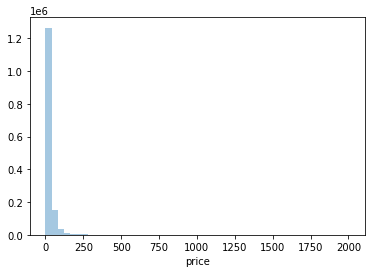

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)
plt.show()

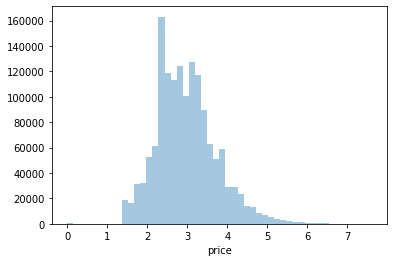

In [24]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)
plt.show()

In [25]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [26]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [27]:
boolean_cond = mercari_df['item_description'] == 'No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [28]:
#apply lambda에서 호출되는 대, 중, 소 분할 함수 생성. 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null','Other_Null','Other_Null']

#위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

#대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형:\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수:', mercari_df['cat_jung'].nunique())
print('소분류 개수:', mercari_df['cat_so'].nunique())

대분류 유형:
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수: 114
소분류 개수: 871


In [29]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value="Other_Null")
mercari_df['category_name'] = mercari_df['category_name'].fillna(value="Other_Null")
mercari_df['item_description'] = mercari_df['item_description'].fillna(value="Other_Null")

#각 칼럼별로 Null 값 건수 확인. 모두 0이 나와야 함
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 피처 인코딩과 피처 벡터화 <br>
- 선형 회귀의 경우 원-핫 인코딩 적용이 선호됨
- 피처 벡터화의 경우는 비교적 짧은 텍스트의 경우는 Count 기반의 벡터화를, 긴 텍스트는 TF-IDF 기반의 벡터화를 적용

In [30]:
print('brand name의 유형 건수:', mercari_df['brand_name'].nunique())
print('brand name sample 5건:\n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수: 4810
brand name sample 5건:
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [31]:
print('name의 종류 개수:', mercari_df['name'].nunique())
print('name sample 10건: \n', mercari_df['name'][:10])

name의 종류 개수: 1225273
name sample 10건: 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


- Name 속성은 유형이 매우 많고, 적은 단어 위주의 텍스트 형태로 되어 있으므로 Count 기반의 피처 벡터화 변환 적용

In [32]:
pd.set_option('max_colwidth', 200)

#item_description의 평균 문자열 크기
print('item_description 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

- 평균 문자열이 145자로 비교적 크므로 해당 칼럼은 TF-IDF로 변환함

In [33]:
#name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

#item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


- CountVectorizer, TfidfVectorizer가 fit_transform()을 통해 반환하는 데이터는 희소 행렬 형태임
- 인코딩 대상 칼럼도 행렬 형태가 아닌 희소 행렬 형태로 인코딩을 적용한 뒤, 함께 결합함
- LabelBinarizer 클래스는 희소 행렬 형태의 원-핫 인코딩 변환을 지원함 (sparse_out=True 파라미터 설정)
<br><br>
<img src='https://ifh.cc/g/FdFflM.png' border='0'></a>

In [34]:
from sklearn.preprocessing import LabelBinarizer

#brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

#cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [35]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape: {0}, X_item_cond_id shape: {1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape: {0}, X_cat_dae shape: {1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape: {0}, X_cat_so shape: {1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape: (1482535, 4810), X_item_cond_id shape: (1482535, 5)
X_shipping shape: (1482535, 1), X_cat_dae shape: (1482535, 11)
X_cat_jung shape: (1482535, 114), X_cat_so shape: (1482535, 871)


- 인코딩 변환된 데이터 세트가 CSR 형태로 변환된 csr_matrix 타입임
- 인코딩 칼럼이 매우 많이 생겼지만, 피처 벡터화로 텍스트 형태의 문자열이 가지는 벡터 형태의 매우 많은 칼럼과 함께 결합되므로 크게 문제가 되지 않음

In [36]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

#hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

#데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


66

### 릿지 회귀 모델 구축 및 평가 <br>
- RMSLE (Root Mean Square Logarithmic Error)는 RMSE와 유사하나 오류 값에 로그를 취해 RMSE를 구하는 방식임
- 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해 이 방식을 도입함
<br><br>
<img src='https://ifh.cc/g/WQzwdr.png' border='0'></a>

In [37]:
def rmsle(y, y_pred):
    #underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred),2)))

def evaluate_org_price(y_test, preds):
    #원본 데이터는 log1p로 변환되었으므로 expm1로 원복 필요
    preds_expm = np.expm1(preds)
    y_test_expm = np.expm1(y_test)

    #rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_expm, preds_expm)
    return rmsle_result

In [38]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    #scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)

    #모델 학습 및 예측
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    del X, X_train, X_test, y_train
    gc.collect()

    return preds, y_test

In [39]:
linear_model = Ridge(solver='lsqr', fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:', evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.5023727038010556
Item Description을 포함한 rmsle 값: 0.47121951434336345


- Item Description을 포함했을 때 rmsle 값이 많이 감소하므로 Item Description 영향이 중요함을 알 수 있음

### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [40]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, linear_preds))

LightGBM rmsle 값: 0.47121951434336345


In [41]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:', evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.45072592143293
